# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [77]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from datetime import datetime
from api_keys import weather_api_key
from citipy import citipy
import numpy as np 
import time
from scipy.stats import linregress

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [78]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [79]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [80]:
def get_current_weather(api_key, city, unit):
    
    url = "http://api.openweathermap.org/data/2.5/weather"
    payload = {
        'appid': api_key,
        'q': city,
        'units': unit
    }
    
    weather_response = requests.get(url, params = payload)
    
    if weather_response.status_code == 200:
        print(f'Processing Record {cities.index(city)} | {city}')
        return weather_response.json() 
    else:
        print('City Not Found. Skipping..')
        return None

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [81]:

# calling the 'get_current_weather' function for each city and storing the result in a list

all_cities = []
unit = 'imperial'

print('Beginning Data Retrieval')
print('--------------------------')

for city in cities:
    city_data = get_current_weather(weather_api_key, city, unit)
    
    # None(returned from the function) is equivalent to False
    if city_data:                                  
        all_cities.append(city_data)
        
print('--------------------------')
print('Data Retrieval Complete')
print('--------------------------')

Beginning Data Retrieval
--------------------------
Processing Record 0 | hobart
Processing Record 1 | okha
Processing Record 2 | paamiut
City Not Found. Skipping..
Processing Record 4 | atuona
Processing Record 5 | cortez
Processing Record 6 | mataura
Processing Record 7 | nalut
Processing Record 8 | kemijarvi
Processing Record 9 | mar del plata
Processing Record 10 | yellowknife
Processing Record 11 | beringovskiy
City Not Found. Skipping..
Processing Record 13 | mercedes
Processing Record 14 | margate
Processing Record 15 | qaanaaq
Processing Record 16 | bluff
Processing Record 17 | xichang
Processing Record 18 | kapaa
Processing Record 19 | rocha
Processing Record 20 | san patricio
Processing Record 21 | dauphin
Processing Record 22 | el carmen
Processing Record 23 | east london
City Not Found. Skipping..
Processing Record 25 | sitka
Processing Record 26 | ilulissat
Processing Record 27 | neiafu
Processing Record 28 | darhan
Processing Record 29 | chuy
Processing Record 30 | imeni 

In [82]:
city_weather_df = pd.DataFrame([{
    'City': citi['name'],
    'Country': citi['sys']['country'],
    'Date': citi['dt'],
    'Cloudiness': citi['clouds']['all'],
    'Humidity': citi['main']['humidity'],
    'Lat': citi['coord']['lat'],
    'Lng': citi['coord']['lon'],
    "Temp": citi["main"]["temp"],
    'Min Tem': citi["main"]["temp_min"],
    'Max Temp': citi["main"]["temp_max"],
    'Wind Speed': citi['wind']['speed']
    
} for citi in all_cities])

city_weather_df

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Temp,Min Tem,Max Temp,Wind Speed
0,Hobart,AU,1627231219,70,76,-42.8794,147.3294,40.91,39.25,42.66,16.11
1,Okha,RU,1627231798,95,86,53.5739,142.9478,66.81,66.81,66.81,8.28
2,Paamiut,GL,1627231454,92,69,61.9940,-49.6678,44.56,44.56,44.56,7.23
3,Atuona,PF,1627231798,45,72,-9.8000,-139.0333,77.20,77.20,77.20,23.53
4,Cortez,US,1627231799,1,63,37.3489,-108.5859,72.86,71.71,80.69,4.61
...,...,...,...,...,...,...,...,...,...,...,...
555,Linqiong,CN,1627231924,47,90,30.4159,103.4609,82.22,82.22,82.22,3.18
556,Sarakhs,IR,1627231925,0,16,36.5449,61.1577,96.94,96.94,96.94,6.91
557,Penzance,GB,1627231925,98,82,50.1186,-5.5371,66.76,66.76,67.21,11.14
558,North Bend,US,1627231701,90,88,43.4065,-124.2243,61.25,58.91,66.85,3.44


In [83]:

# generating the count of each column
city_weather_df.count()

City          560
Country       560
Date          560
Cloudiness    560
Humidity      560
Lat           560
Lng           560
Temp          560
Min Tem       560
Max Temp      560
Wind Speed    560
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [84]:
# there are no cities with over 100 humidity

In [85]:
#  Get the indices of cities that have humidity over 100%.


In [86]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

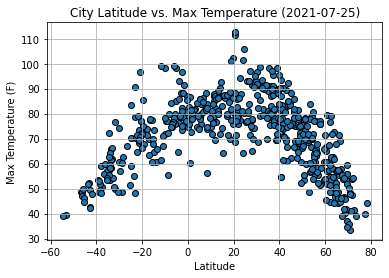

In [87]:
plt.scatter(city_weather_df['Lat'], city_weather_df['Max Temp'], ec='black'),
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({date.today()})')

plt.savefig('City Latitude vs. Max Temperature.png')
plt.show()

## Latitude vs. Humidity Plot

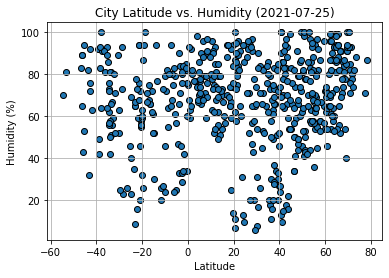

In [88]:
plt.scatter(city_weather_df['Lat'], city_weather_df['Humidity'], ec='black'),
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date.today()})')

plt.savefig('City Latitude vs. Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

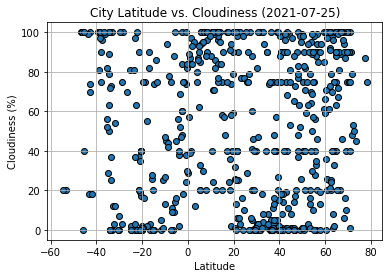

In [89]:
plt.scatter(city_weather_df['Lat'], city_weather_df['Cloudiness'], ec='black')
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date.today()})')

plt.savefig('City Latitude vs. Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

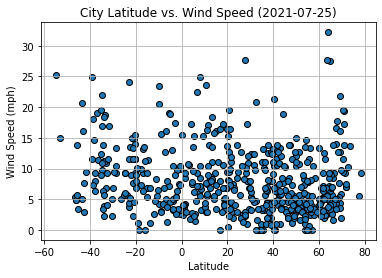

In [90]:
plt.scatter(city_weather_df['Lat'], city_weather_df['Wind Speed'], ec='black'),
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({date.today()})')

plt.savefig('City Latitude vs. Wind Speed.png')
plt.show()

## Linear Regression

In [94]:
#function to create linear regression plots

# Make a function that accepts a list of x values and y values, a description for the x and y axes,
# a string that describes which hemisphere is being analyzed and a filename to use while saving the figure
# and finally the x,y coordinates to create the annotation of the equation on the graph
def make_lin_reg_plot(x_values,y_values,x_desc,y_desc,hemisphere,filename,x_ann,y_ann):
    # Print out the r-squared value along with the plot.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere}-\nCity {x_desc} vs. {y_desc} {date.today}")
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")
    plt.xlabel(x_desc)
    plt.ylabel(y_desc)
    print(f"The r-squared is: {rvalue}")
    print(line_eq)
    plt.savefig(f'Figures/{filename}')
    plt.show()

In [95]:
# Create Northern and Southern Hemisphere DataFrames
# store the boolean criteria in a variable to pass to the dataframe indexing function
crit_north = city_weather_df.Lat >= 0
crit_south = city_weather_df.Lat < 0

# Create the north and south hemisphere dataframes using boolean indexing from the criteria from above 
north_weather = city_weather_df[crit_north]
south_weather = city_weather_df[crit_south]

# The indexes will not be continuous so they need to be reset with the drop=True argument so we don't make
# the prior index as a column
north_weather = north_weather.reset_index(drop=True)
south_weather = south_weather.reset_index(drop=True)

south_weather.head()

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Temp,Min Tem,Max Temp,Wind Speed
0,Hobart,AU,1627231219,70,76,-42.8794,147.3294,40.91,39.25,42.66,16.11
1,Atuona,PF,1627231798,45,72,-9.8000,-139.0333,77.20,77.20,77.20,23.53
2,Mataura,NZ,1627231325,100,89,-46.1927,168.8643,48.47,48.47,48.47,5.01
3,Mar del Plata,AR,1627231680,75,64,-38.0023,-57.5575,57.07,52.00,59.09,8.01
4,Mercedes,AR,1627231731,89,73,-34.6515,-59.4307,57.16,55.83,57.63,9.82


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7062387951202523
y = -0.5x + 91.62


FileNotFoundError: [Errno 2] No such file or directory: 'Figures/City Latitude vs. Max Temperature.png'

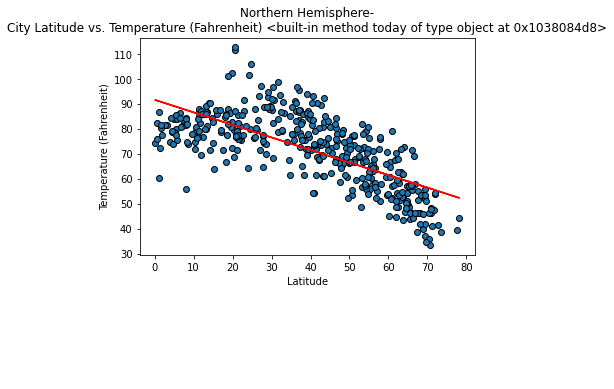

In [110]:

make_lin_reg_plot(north_weather["Lat"],north_weather["Temp"],\
                  'Latitude','Temperature (Fahrenheit)','Northern Hemisphere',\
                 'City Latitude vs. Max Temperature.png',6,-20)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8065772189379652
y = 0.81x + 85.15


FileNotFoundError: [Errno 2] No such file or directory: 'Figures/SouthHemiLatVsTemp.png'

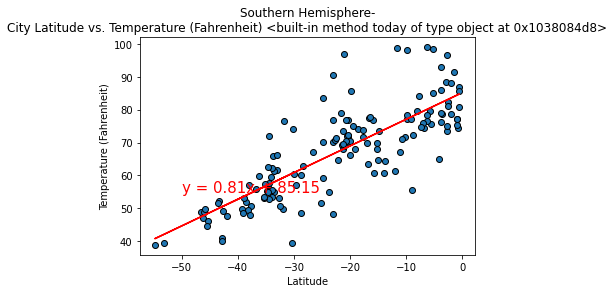

In [102]:
make_lin_reg_plot(south_weather["Lat"],south_weather["Temp"],\
                  'Latitude',f'Temperature (Fahrenheit)','Southern Hemisphere',\
                 'SouthHemiLatVsTemp.png',-50,55)

In the northern hemisphere, there seems to be a negative relationship between decreasing latitude and decreasing temperature. While in the southern hemisphere, there is a positive correlation between increasing temperature and increasing latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06426630065966148
y = 0.07x + 66.8


FileNotFoundError: [Errno 2] No such file or directory: 'Figures/NorthHemiLatVsHumidity.png'

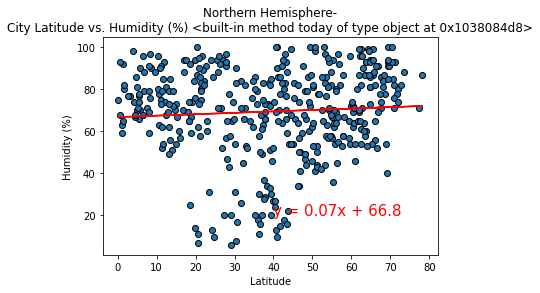

In [104]:
make_lin_reg_plot(north_weather["Lat"],north_weather["Humidity"],\
                  'Latitude',f'Humidity (%)','Northern Hemisphere',\
                 'NorthHemiLatVsHumidity.png',40,20)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.154336475535167
y = -0.24x + 58.65


FileNotFoundError: [Errno 2] No such file or directory: 'Figures/SouthHemiLatVsHumidity.png'

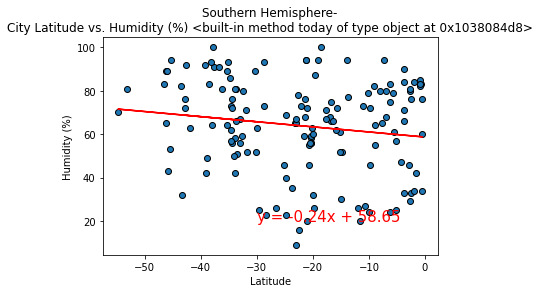

In [105]:
make_lin_reg_plot(south_weather["Lat"],south_weather["Humidity"],\
                  'Latitude',f'Humidity (%)','Southern Hemisphere',\
                 'SouthHemiLatVsHumidity.png',-30,20)

Both of these regressions show rather weak correlation between humidity and latitude for both hemispheres. Could suggest other factors play a larger role in determining humidity. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.03549949209171453
y = -0.07x + 58.9


FileNotFoundError: [Errno 2] No such file or directory: 'Figures/NorthHemiLatVsCloudiness.png'

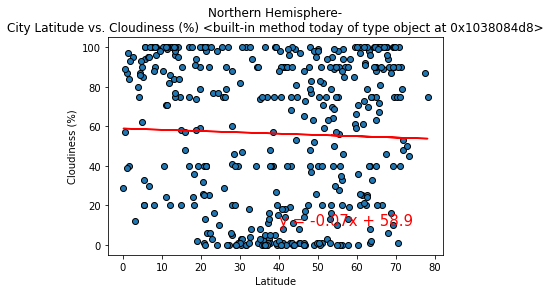

In [106]:
make_lin_reg_plot(north_weather["Lat"],north_weather["Cloudiness"],\
                  'Latitude',f'Cloudiness (%)','Northern Hemisphere',\
                 'NorthHemiLatVsCloudiness.png',40,10)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.17344884206377315
y = -0.46x + 36.99


FileNotFoundError: [Errno 2] No such file or directory: 'Figures/SouthHemiLatVsCloudiness.png'

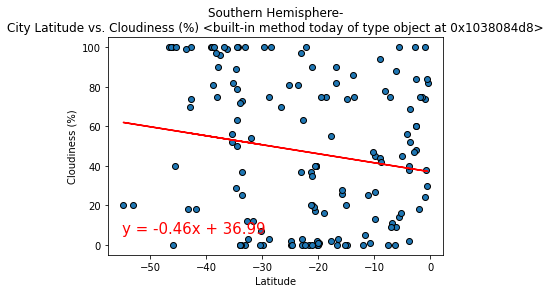

In [107]:
make_lin_reg_plot(south_weather["Lat"],south_weather["Cloudiness"],\
                  'Latitude',f'Cloudiness (%)','Southern Hemisphere',\
                 'SouthHemiLatVsCloudiness.png',-55,6)

Similar to the humidity graphs, there is not a huge correlation between cloudiness and latitude. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.04657599502417664
y = -0.01x + 7.84


FileNotFoundError: [Errno 2] No such file or directory: 'Figures/NorthHemiLatVsWindSpeed.png'

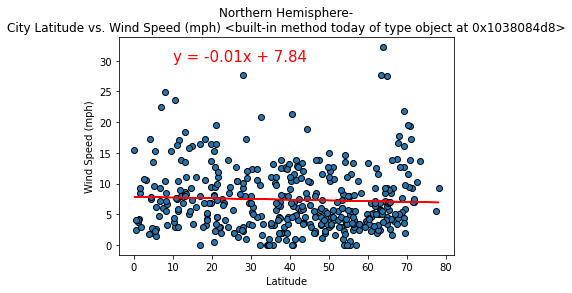

In [108]:

make_lin_reg_plot(north_weather["Lat"],north_weather["Wind Speed"],\
                  'Latitude',f'Wind Speed (mph)','Northern Hemisphere',\
                 'NorthHemiLatVsWindSpeed.png',10,30)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2411799317297431
y = -0.1x + 7.12


FileNotFoundError: [Errno 2] No such file or directory: 'Figures/SouthHemiLatVsWindSpeed.png'

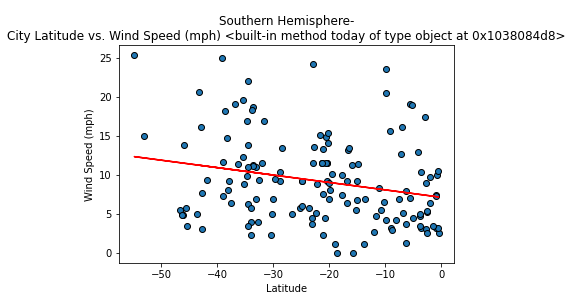

In [109]:
make_lin_reg_plot(south_weather["Lat"],south_weather["Wind Speed"],\
                  'Latitude',f'Wind Speed (mph)','Southern Hemisphere',\
                 'SouthHemiLatVsWindSpeed.png',-30,30)

In the northern hemisphere, there is almost no correlation between latitude and wind speed. While in the southern hemisphere, there is a slight negative correlation between the two. 